In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from image_processing import detect_circle

In [3]:
path_name = "fotos_experimento"
path_list = os.listdir(path_name)

In [4]:
def ordenar(item):
    partes = item.split()
    num_principal = int(partes[0])
    num_placa = int(partes[2])
    hora = partes[3].replace('.jpg', '')
    return (num_principal, num_placa, hora)

path_list.sort(key=ordenar)


In [5]:
path_image_list = [f'{path_name}/' + i for i in path_list]

In [6]:
df = pd.DataFrame()
datas = []
samples = []

for path in path_image_list:
    for i in range(1,4):
        id = "placa " + str(i)
        if id in path:
            id_name = id
    
    data = path[-12:].split('.')[0].replace("_",":")

    datas.append(data)
    samples.append(id_name)


df['Hora'] = datas
df['Amostra'] = samples
df['Pasta'] = path_image_list

In [ ]:
matrix_medias = []

for j in range(1,3):
    filtro = df['Amostra'] == f'placa {j}'
    df_p_uso = df[filtro]

    medias = []
    progresso = []

    for i,pasta in enumerate(df_p_uso['Pasta']):
            
        coved_area1,coved_area2,no_grad_norm,masked  = detect_circle(pasta,(200,210),(0,1))
        filter = (masked > 70) & (masked < 180)

        media = masked.reshape(-1).mean()
        media = np.count_nonzero(filter*255)/np.count_nonzero(masked)

        medias.append(media)
        progresso.append(i)

    matrix_medias.append(medias)

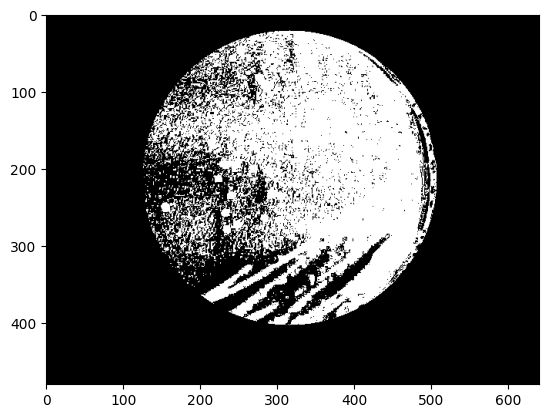

In [ ]:
coved_area1,coved_area2,no_grad_norm,masked = detect_circle(pasta,(200,210),(0,1))
filter = (masked > 100) & (masked < 180)
plt.imshow(filter,cmap='gray')

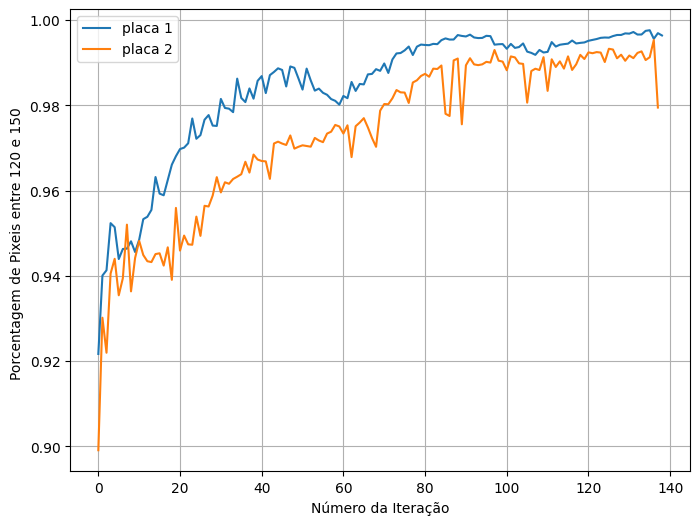

In [ ]:
plt.figure(figsize=(8,6))
plt.grid()
for i in range(2):
    plt.plot([j for j in range(len(matrix_medias[i]))],matrix_medias[i], label=f'placa {i+1}')

    plt.legend()
    plt.ylabel("Porcentagem de Pixeis entre 120 e 150 ")

    plt.xlabel("Número da Iteração")


In [ ]:
import numpy as np
from scipy.optimize import curve_fit

def verhulst(t, K, A, r):
    return K / (1 + A * np.exp(-r * t))

verhulst_curvas = []

parametros_fit =[]

for i in range(len(matrix_medias)):
    t = np.arange(len(matrix_medias[i]))
    y = np.array(matrix_medias[i])

    p0 = [max(y), 1, 0.1]
    params, _ = curve_fit(verhulst, t, y, p0=p0, maxfev=10000)

    parametros_fit.append(params)

In [ ]:
K, A, r = parametros_fit[0] 
t = np.arange(138)
Vr1 = K / (1 + A * np.exp(-r * t))


K, A, r = parametros_fit[1] 
t = np.arange(138)
Vr2 = K / (1 + A * np.exp(-r * t))

Text(0.5, 0, 'Tempo(h)')

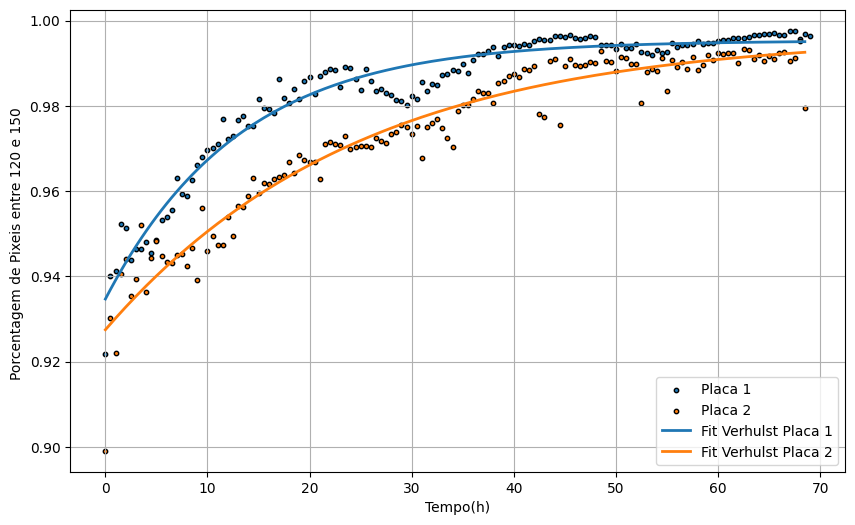

In [ ]:
plt.figure(figsize=(10,6))
plt.grid()

for i in range(2):
    tempo = np.arange(len(matrix_medias[i]))/2

    plt.scatter(tempo,matrix_medias[i], label=f'Placa {i+1}',s=10,edgecolors='black')

    
t = np.arange(len(Vr1))/2
plt.plot(t,Vr1, label="Fit Verhulst Placa 1",linewidth=2)
plt.plot(t,Vr2, label="Fit Verhulst Placa 2",linewidth=2)

plt.legend()
plt.ylabel("Porcentagem de Pixeis entre 120 e 150 ")

plt.xlabel("Tempo(h)")